In [1]:
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

with open('forecast.json','r') as f:
    data = json.loads(f.read())
    

In [2]:
forecastday = data['forecast']['forecastday']

In [3]:
hour_data = []
wdays=[ 'Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun' ]
i = 0
for day in forecastday:
    for hour in day['hour']:
        dt_str = hour['time']
        dt_obj = datetime.strptime( dt_str, '%Y-%m-%d %H:%M')
        row = {
            'text': hour['condition']['text'],
            'icon': hour['condition']['icon'],
            'hour': wdays[ dt_obj.weekday() ] + '\n' + str( dt_obj.hour ) + ':00'
        }
        for key, value in hour.items():
            if key != 'condition':
                row[key] = value
        hour_data.append( row )
    i += 1
                

In [4]:
df = pd.DataFrame( hour_data )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            120 non-null    object 
 1   icon            120 non-null    object 
 2   hour            120 non-null    object 
 3   time_epoch      120 non-null    int64  
 4   time            120 non-null    object 
 5   temp_c          120 non-null    float64
 6   temp_f          120 non-null    float64
 7   is_day          120 non-null    int64  
 8   wind_mph        120 non-null    float64
 9   wind_kph        120 non-null    float64
 10  wind_degree     120 non-null    int64  
 11  wind_dir        120 non-null    object 
 12  pressure_mb     120 non-null    float64
 13  pressure_in     120 non-null    float64
 14  precip_mm       120 non-null    float64
 15  precip_in       120 non-null    float64
 16  humidity        120 non-null    int64  
 17  cloud           120 non-null    int

In [5]:
df.head()

,text,icon,hour,time_epoch,time,temp_c,temp_f,is_day,wind_mph,wind_kph,...,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv
0,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/night/176.png,Wed\n0:00,1677628800,2023-03-01 00:00,5.1,41.2,0,6.7,10.8,...,37.2,0,61,0,0,10.0,6.0,9.4,15.1,1.0
1,Cloudy,//cdn.weatherapi.com/weather/64x64/night/119.png,Wed\n1:00,1677632400,2023-03-01 01:00,5.1,41.2,0,6.5,10.4,...,36.5,0,0,0,0,10.0,6.0,9.2,14.8,1.0
2,Cloudy,//cdn.weatherapi.com/weather/64x64/night/119.png,Wed\n2:00,1677636000,2023-03-01 02:00,5.1,41.2,0,6.7,10.8,...,35.6,0,0,0,0,10.0,6.0,9.8,15.8,1.0
3,Cloudy,//cdn.weatherapi.com/weather/64x64/night/119.png,Wed\n3:00,1677639600,2023-03-01 03:00,5.1,41.2,0,7.8,12.6,...,32.5,0,0,0,0,10.0,6.0,11.2,18.0,1.0
4,Cloudy,//cdn.weatherapi.com/weather/64x64/night/119.png,Wed\n4:00,1677643200,2023-03-01 04:00,4.9,40.8,0,6.7,10.8,...,34.0,0,0,0,0,10.0,6.0,9.4,15.1,1.0


In [21]:
import numpy as np

<AxesSubplot: >

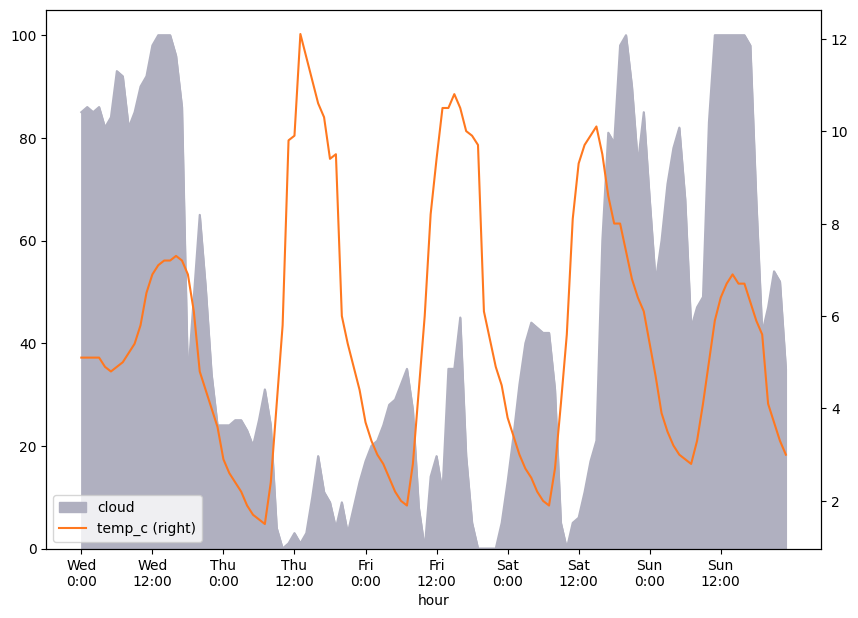

In [22]:
fig, ax = plt.subplots(figsize=(10,7)) 
plt.xticks( np.arange( 0 , df.shape[0] , 12 ))
df.plot.area( x = 'hour' , y = 'cloud', ax = ax , color=( '#B0B0C0' ) ) 
df.plot( x = 'hour' , y = 'temp_c' , ax = ax , secondary_y = True , color=( '#FF781F' ) ) 
